In [715]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [716]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [717]:
loc_file = '/Users/fuwang/Documents/Columbia/Fall 2022/5243/Group Project 2/fall2022-project2-group11-ferra/data/LinkNYC_Locations.csv'
usage_file = '/Users/fuwang/Documents/Columbia/Fall 2022/5243/Group Project 2/fall2022-project2-group11-ferra/data/LinkNYC_Usage_Statistics_Historical_Data.csv'

In [718]:
df_loc = pd.read_csv(loc_file)
df_usage = pd.read_csv(usage_file)

In [719]:
df_loc.shape,df_usage.shape

((1996, 21), (200, 9))

## Thoughts: 
1. General overall look, Sanity Check: any missing values, outliers 
2. Convert datetime-like string to datetime, and usage time (format %H:%M:%S) to datetime so that we could analyze the trending of numeric value over the time period
3. Removing features that are irrelevant to our analysis and also adding new features that will contribute to our furthur analysis 

In [759]:
df_loc.keys()

Index(['CB Link ID', 'Borough', 'Latitude', 'Longitude', 'Project Status',
       'Active_date', 'Install_date', 'neighborhood', 'Census Tract (CT)',
       'IxN Corner', 'Location'],
      dtype='object')

In [760]:
df_loc.rename(columns={'Link Smoke Tested and Activated (A)':'Active_date',
                      'Link Installation (A)':'Install_date',
                      'Neighborhood Tabulation Area (NTA)':'neighborhood',
                      },inplace=True)

In [761]:
# df_usage['Week'] = pd.to_datetime(df_usage.Week.str[7:])
df_loc['Active_date'] = pd.to_datetime(df_loc['Active_date'])
df_loc['Install_date'] = pd.to_datetime(df_loc['Install_date'])

In [762]:
df_loc.head()

,CB Link ID,Borough,Latitude,Longitude,Project Status,Active_date,Install_date,neighborhood,Census Tract (CT),IxN Corner,Location
0,LINK-000491,Manhattan,40.763051,-73.985830,Live,2016-10-26,2016-10-15,Clinton,1013300.0,NW,"(40.76305136, -73.98583017)"
1,LINK-012865,Manhattan,40.759234,-73.965504,Live,2018-06-12,2018-04-07,Turtle Bay-East Midtown,1010800.0,SW,"(40.75923366, -73.96550379)"
2,LINK-001486,Manhattan,40.790235,-73.974793,Live,2017-10-25,2017-09-10,Upper West Side,1017500.0,NE,"(40.790235, -73.974793)"
3,NaN,Bronx,40.816958,-73.895714,Live,2022-05-25,2021-11-11,Hunts Point,2008900.0,MIDBLOCK,"(40.81695812880762, -73.8957139698328)"
4,LINK-000220,Manhattan,40.739336,-73.995264,Live,2018-04-04,2018-02-04,Hudson Yards-Chelsea-Flatiron-Union Square,1005400.0,NE,"(40.73933558, -73.99526424)"


In [763]:
for item in df_loc.keys():
    print('The type of this variable',item ,'is ', type(df_loc[item][0]))

The type of this variable CB Link ID is  <class 'str'>
The type of this variable Borough is  <class 'str'>
The type of this variable Latitude is  <class 'numpy.float64'>
The type of this variable Longitude is  <class 'numpy.float64'>
The type of this variable Project Status is  <class 'str'>
The type of this variable Active_date is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The type of this variable Install_date is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The type of this variable neighborhood is  <class 'str'>
The type of this variable Census Tract (CT) is  <class 'numpy.float64'>
The type of this variable IxN Corner is  <class 'str'>
The type of this variable Location is  <class 'str'>


In [764]:
df_loc.describe()

,Latitude,Longitude,Census Tract (CT)
count,1996.000000,1996.000000,1.966000e+03
mean,40.756897,-73.952227,1.851699e+06
std,0.055030,0.048712,1.218037e+06
min,40.561755,-74.116075,3.030000e+02
25%,40.730568,-73.982566,1.010200e+06
50%,40.754708,-73.962891,1.019500e+06
75%,40.795602,-73.929248,3.015550e+06
max,40.875751,-73.755939,5.018100e+06


In [765]:
df_loc.isnull().sum().sort_values(ascending=False)
# There are some missing values, and we will take a deeper look in a bit later 

CB Link ID           123
Active_date           51
Census Tract (CT)     30
IxN Corner            17
neighborhood           1
Borough                0
Latitude               0
Longitude              0
Project Status         0
Install_date           0
Location               0
dtype: int64

CB Link ID should be the primary key and yet it has missing values which means that some of device are not recognizable, thus for our best interests, we should consider drop those rows with missing values

In [766]:
df_loc_reco = df_loc.dropna(subset=['CB Link ID'])

In [767]:
df_loc_reco.isnull().sum().sort_values(ascending=False)

IxN Corner           4
Active_date          3
CB Link ID           0
Borough              0
Latitude             0
Longitude            0
Project Status       0
Install_date         0
neighborhood         0
Census Tract (CT)    0
Location             0
dtype: int64

We can see that after we drop the unrecognized devices, the dataset is getting a lot cleaner

Now, let's have a peek of what kind of data we ware missing and weather they are useful or not 

In [768]:
missing = df_loc_reco.isnull().sum().sort_values(ascending=False).keys()[:3]

In [769]:
for item in missing:
    print('The value of ',item ,'is ', '-', df_loc[item][0],'-')

The value of  IxN Corner is  - NW -
The value of  Active_date is  - 2016-10-26 00:00:00 -
The value of  CB Link ID is  - LINK-000491 -


**Active_date:** The date in which the construction of a Kiosk was Activated.

**Census Tract (CT):** Permanent statistical subdivisions to provide a stable set of geographic units for the presentation of statistical data.

**IxN Corner:** The direction the Kiosk is facing.

**Smallest PPT:** The Public Pay Telephone unique identification number.

**Borough-Block-Lot (BBL):** Every real estate property is identified by a set of 3 numbers for taxes, zoning, construction, and other purposes.


In [770]:
df_loc_reco.keys()

Index(['CB Link ID', 'Borough', 'Latitude', 'Longitude', 'Project Status',
       'Active_date', 'Install_date', 'neighborhood', 'Census Tract (CT)',
       'IxN Corner', 'Location'],
      dtype='object')

In [771]:
useful_keys = ['CB Link ID','Borough','Latitude', 'Longitude','Project Status','Active_date',
       'Install_date', 'neighborhood','Census Tract (CT)','IxN Corner', 'Location']

In [772]:
df_loc_reco = df_loc_reco[useful_keys]
df_loc = df_loc[useful_keys]

In [773]:
df_loc[df_loc['Active_date']<df_loc['Install_date']]

,CB Link ID,Borough,Latitude,Longitude,Project Status,Active_date,Install_date,neighborhood,Census Tract (CT),IxN Corner,Location


Hence no outlier for install and activate date 

In [774]:
df_loc_reco.isnull().sum().sort_values(ascending=False)

IxN Corner           4
Active_date          3
CB Link ID           0
Borough              0
Latitude             0
Longitude            0
Project Status       0
Install_date         0
neighborhood         0
Census Tract (CT)    0
Location             0
dtype: int64

In [775]:
df_loc_reco[df_loc_reco['Active_date'].isnull()]

,CB Link ID,Borough,Latitude,Longitude,Project Status,Active_date,Install_date,neighborhood,Census Tract (CT),IxN Corner,Location
168,LINK-020764,Brooklyn,40.722328,-73.949671,Ready for Activation,NaT,2017-06-30,Greenpoint,3056900.0,NE,"(40.722328, -73.949671)"
1080,LINK-013993,Manhattan,40.748758,-74.006904,Installed,NaT,2017-10-07,Hudson Yards-Chelsea-Flatiron-Union Square,1009900.0,SE,"(40.74875784, -74.00690371)"
1389,LINK-011082,Manhattan,40.742419,-74.004444,Installed,NaT,2018-08-07,Hudson Yards-Chelsea-Flatiron-Union Square,1008300.0,NW,"(40.74241855, -74.00444413)"


In [776]:
df_loc[df_loc['Active_date'].isnull()][df_loc['CB Link ID'].isnull()]['Install_date'].dt.year.value_counts()

/var/folders/30/9c87sl6d2zzgttgpc8zzymlm0000gn/T/ipykernel_35839/3770473127.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_loc[df_loc['Active_date'].isnull()][df_loc['CB Link ID'].isnull()]['Install_date'].dt.year.value_counts()


2022    48
Name: Install_date, dtype: int64

Deviced installed yet not activated are very recenent without an identity id, and the reason why the old devices are still not yet activated will needed more information to dig into and is not irrelvant to our project and hence the rows will be dropped 

In [777]:
df_loc_reco.dropna(subset=['Active_date'],inplace=True)

In [778]:
df_loc_reco.shape

(1870, 11)

**For data sanity**: Below we will use the dataset -- df_loc_reco

In [779]:
df_loc_reco['IxN Corner'].value_counts()

SE          453
NE          439
SW          426
NW          418
MIDBLOCK    123
W             3
S             2
E             2
Name: IxN Corner, dtype: int64

In [780]:
df_loc_reco[df_loc_reco['IxN Corner'].isnull()]

,CB Link ID,Borough,Latitude,Longitude,Project Status,Active_date,Install_date,neighborhood,Census Tract (CT),IxN Corner,Location
53,SC90807,Manhattan,40.797946,-73.971379,Live,1992-05-28,1992-05-28,Upper West Side,1018700.0,NaN,"(40.79794552, -73.97137922)"
472,SC90271,Manhattan,40.798583,-73.970917,Live,1971-12-01,1971-12-01,Upper West Side,1018700.0,NaN,"(40.7985831, -73.97091731)"
890,SC90265,Manhattan,40.791576,-73.976024,Live,1971-12-01,1971-12-01,Upper West Side,1017900.0,NaN,"(40.79157583, -73.97602374)"
1294,SC90256,Manhattan,40.776177,-73.987283,Live,1971-12-01,1971-12-01,Lincoln Square,1015500.0,NaN,"(40.77617732, -73.9872827)"


In [781]:
df_loc_reco['IxN Corner'].mode()

0    SE
Name: IxN Corner, dtype: object

Here we choose to fill the NA value by mode values 

In [782]:
df_loc_reco['IxN Corner'].fillna('SE',inplace=True)

In [783]:
df_loc_reco[df_loc_reco['IxN Corner'].isnull()]

,CB Link ID,Borough,Latitude,Longitude,Project Status,Active_date,Install_date,neighborhood,Census Tract (CT),IxN Corner,Location


In [784]:
print('The number of duplicated row is', df_loc_reco.duplicated().sum())

The number of duplicated row is 0


There is no duplicated values 

In [785]:
df_loc_reco.isnull().sum().sort_values(ascending=False)

CB Link ID           0
Borough              0
Latitude             0
Longitude            0
Project Status       0
Active_date          0
Install_date         0
neighborhood         0
Census Tract (CT)    0
IxN Corner           0
Location             0
dtype: int64

In [786]:
df_loc_reco['Install_date'].dt.year.value_counts()

2017    926
2016    616
2018    320
1971      3
2015      2
2019      2
1992      1
Name: Install_date, dtype: int64

In [787]:
df_loc_reco['Active_date'].dt.year.value_counts()

2017    702
2018    539
2016    520
2019     55
2020     48
1971      3
2021      2
1992      1
Name: Active_date, dtype: int64

LinkNYC is a program in New York City to distribute the Internet to a wider group of people. The first kiosks, or "Links," started in late 2015. The initial plan, supported by the CityBridge, intended to install 7,000 kiosks across the city.And thus with year of 1992 and 1971 will be droped 

In [788]:
df_loc_reco[df_loc_reco['Install_date'].dt.year ==1992]

,CB Link ID,Borough,Latitude,Longitude,Project Status,Active_date,Install_date,neighborhood,Census Tract (CT),IxN Corner,Location
53,SC90807,Manhattan,40.797946,-73.971379,Live,1992-05-28,1992-05-28,Upper West Side,1018700.0,SE,"(40.79794552, -73.97137922)"


As the below usage dataset only contains data between year 2016 til year 2019, thus we will drop the rows for location for better analysis

Since this here I didn't use sql and so I will add a new year column to dropping convinence 

In [789]:
df_loc_reco['year'] = df_loc_reco['Install_date'].dt.year

In [790]:
type(df_loc_reco['year'][0])

numpy.int64

In [791]:
df_loc_reco = df_loc_reco[df_loc_reco['year'].isin([2015,2016,2017,2018,2019,2020,2021,2022])]

In [792]:
df_loc_reco['year'].value_counts()

2017    926
2016    616
2018    320
2015      2
2019      2
Name: year, dtype: int64

In [793]:
df_loc_reco.shape

(1866, 12)

In [794]:
df_loc_reco['Install_date'].dt.year.value_counts()

2017    926
2016    616
2018    320
2015      2
2019      2
Name: Install_date, dtype: int64

Now our data (Location) is cleaned and ready to be used for analysis 

# Cleaning for df_usage


In [519]:
df_usage.isnull().sum().sort_values(ascending=False)

Average Session Duration                         1
Week                                             0
Sessions Per Week                                0
Cumulative Sessions To Date                      0
Bandwidth Utilization Per Week (TB)              0
Cumulative Bandwidth Utilization To Date (TB)    0
New Subscribers Per Week                         0
Total Subscribers Per Week                       0
Cumulative Subscribers To Date                   0
dtype: int64

Mostly the problem is about Average Usage towards each session, and later we might 
convert the Average Session Duration in to datetime and add a new feature: total usage second,
and then convert it back to numeric values so that will can fill na by mean or mode and etc 
 

In [520]:
print('The number of duplicated row is', df_usage.duplicated().sum())

The number of duplicated row is 0


In [521]:
df_usage[df_usage['Average Session Duration'].isna()] 
#Since this value is NaN, later we need to pay attention when converting it to datetime 

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date
40,Week of 12/5/2016,3918249,61668967,27.75,468.39,NaN,24861,261267,895785


In [522]:
df_usage['Week'] = pd.to_datetime(df_usage.Week.str[7:])

In [523]:
df_usage['Usage_time'] = pd.to_timedelta(df_usage['Average Session Duration']).dt.total_seconds()

In [524]:
df_usage['Average Session Duration'] = df_usage['Average Session Duration'].str[2:-4]

In [525]:
df_usage['Average Session Duration']=pd.to_datetime(df_usage['Average Session Duration'],
                                                    errors='coerce',format='%H:%M:%S').dt.time

In [526]:
df_usage.head()

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
0,2016-02-29,31523,161899,0.418,1.73,00:03:01,1022,2391,6116,181.0
1,2016-03-07,54896,216795,0.635,1.84,00:02:47,2216,4041,8357,167.0
2,2016-03-14,61217,285012,0.602,2.32,00:02:49,2587,4983,10984,169.0
3,2016-03-21,103613,381766,1.103,3.21,00:03:09,5223,8322,15920,189.0
4,2016-03-28,158420,540186,1.315,5.28,00:02:53,6235,10961,22232,173.0


In [527]:
df_usage.tail()

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
195,2019-12-02,14892304,2196520683,103.43,13888.96,00:04:57,38120,701568,8237849,297.0
196,2019-12-09,14339704,2210860387,108.07,14006.77,00:04:39,36784,683341,8274633,279.0
197,2019-12-16,14090776,2224951163,110.31,14126.62,00:05:03,44967,681315,8319600,303.0
198,2019-12-23,12960131,2237911294,102.85,14240.25,00:05:14,76666,673375,8396266,314.0
199,2019-12-30,13303758,2251215052,102.88,14353.83,00:05:14,65573,676634,8461839,314.0


In [528]:
df_usage.isnull().sum().sort_values(ascending=False)
# This means we have some problematic Average Session Duration when we tried to convert 
# However, since we won't gonna use it directly and so we only need to fill  the na value  for Usage_time 

Average Session Duration                         3
Usage_time                                       1
Week                                             0
Sessions Per Week                                0
Cumulative Sessions To Date                      0
Bandwidth Utilization Per Week (TB)              0
Cumulative Bandwidth Utilization To Date (TB)    0
New Subscribers Per Week                         0
Total Subscribers Per Week                       0
Cumulative Subscribers To Date                   0
dtype: int64

In [529]:
df_usage[df_usage['Usage_time'].isna()] 

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
40,2016-12-05,3918249,61668967,27.75,468.39,NaT,24861,261267,895785,NaN


In [530]:
df_usage['Usage_time'].mode()[0]

225.0

In [531]:
df_usage['Usage_time'][40] = df_usage['Usage_time'].mode()[0]

/var/folders/30/9c87sl6d2zzgttgpc8zzymlm0000gn/T/ipykernel_35839/2328566047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usage['Usage_time'][40] = df_usage['Usage_time'].mode()[0]


In [532]:
df_usage.iloc[40] # All set 

Week                                             2016-12-05 00:00:00
Sessions Per Week                                            3918249
Cumulative Sessions To Date                                 61668967
Bandwidth Utilization Per Week (TB)                            27.75
Cumulative Bandwidth Utilization To Date (TB)                 468.39
Average Session Duration                                         NaT
New Subscribers Per Week                                       24861
Total Subscribers Per Week                                    261267
Cumulative Subscribers To Date                                895785
Usage_time                                                     225.0
Name: 40, dtype: object

**_Findings_:**
1. Sessions Per Week and Cumulative Sessions to Date aren't strictly adding up, for example, do the math in row 1 and row 2. In fact mamy numeric values and its corresponding cumulative sum up are not strictly correlated. 
2. The Week part contains the week from 2016 to 2019 

In [533]:
for item in df_usage.keys():
    print('The type of this variable',item ,'is ', type(df_usage[item][0]))

The type of this variable Week is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The type of this variable Sessions Per Week is  <class 'numpy.int64'>
The type of this variable Cumulative Sessions To Date is  <class 'numpy.int64'>
The type of this variable Bandwidth Utilization Per Week (TB) is  <class 'numpy.float64'>
The type of this variable Cumulative Bandwidth Utilization To Date (TB) is  <class 'numpy.float64'>
The type of this variable Average Session Duration is  <class 'datetime.time'>
The type of this variable New Subscribers Per Week is  <class 'numpy.int64'>
The type of this variable Total Subscribers Per Week is  <class 'numpy.int64'>
The type of this variable Cumulative Subscribers To Date is  <class 'numpy.int64'>
The type of this variable Usage_time is  <class 'numpy.float64'>


In [567]:
df_usage['Week'].dt.year.value_counts()

2018    53
2019    53
2017    50
2016    44
Name: Week, dtype: int64

In [534]:
df_usage.Week.tail()

195   2019-12-02
196   2019-12-09
197   2019-12-16
198   2019-12-23
199   2019-12-30
Name: Week, dtype: datetime64[ns]

In [535]:
df_usage.describe()

,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
count,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,1.131229e+07,8.166914e+08,64.106715,5093.513450,41742.705000,515167.265000,3.634425e+06,250.900000
std,6.507911e+06,7.420614e+08,34.926714,4469.401759,16011.055793,247770.916195,2.585772e+06,51.482446
min,3.152300e+04,1.618990e+05,0.418000,1.730000,1022.000000,2391.000000,6.116000e+03,161.000000
25%,4.974461e+06,1.032306e+08,32.600000,778.315000,30486.000000,316446.000000,1.186680e+06,225.000000
50%,1.403682e+07,5.998632e+08,69.680000,4102.975000,43357.000000,636279.500000,3.409909e+06,239.000000
75%,1.598653e+07,1.484036e+09,91.845000,8720.747500,54745.750000,707542.250000,5.869277e+06,277.000000
max,2.194392e+07,2.251215e+09,133.240000,14353.830000,76666.000000,767755.000000,8.461839e+06,489.000000


As for now the Average Session Duration is no longer containing useful information, thus we can drop the colunm 

In [541]:
df_usage.drop(['Average Session Duration'],inplace=True,axis=1)

In [542]:
df_usage.isna().sum()

Week                                             0
Sessions Per Week                                0
Cumulative Sessions To Date                      0
Bandwidth Utilization Per Week (TB)              0
Cumulative Bandwidth Utilization To Date (TB)    0
New Subscribers Per Week                         0
Total Subscribers Per Week                       0
Cumulative Subscribers To Date                   0
Usage_time                                       0
dtype: int64

Now our dataset (usage) is cleaned and ready to be used for analysis

## Visualization For Usage dataset 

In [666]:
df_loc_reco.keys()

Index(['CB Link ID', 'Borough', 'Latitude', 'Longitude', 'Project Status',
       'Active_date', 'Install_date', 'neighborhood', 'Census Tract (CT)',
       'IxN Corner', 'Location', 'year'],
      dtype='object')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

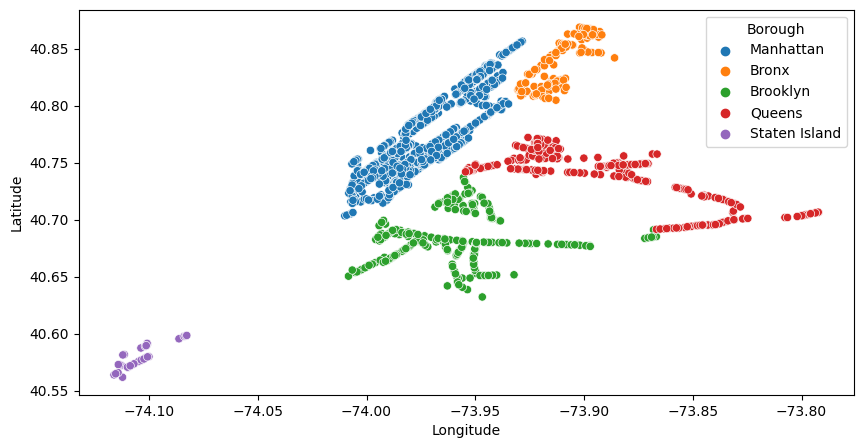

In [665]:
# map of Borough group (geographic distribution)
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_loc_reco.Longitude,y=df_loc_reco.Latitude, hue=df_loc_reco.Borough)

### General View

<AxesSubplot:xlabel='year', ylabel='count'>

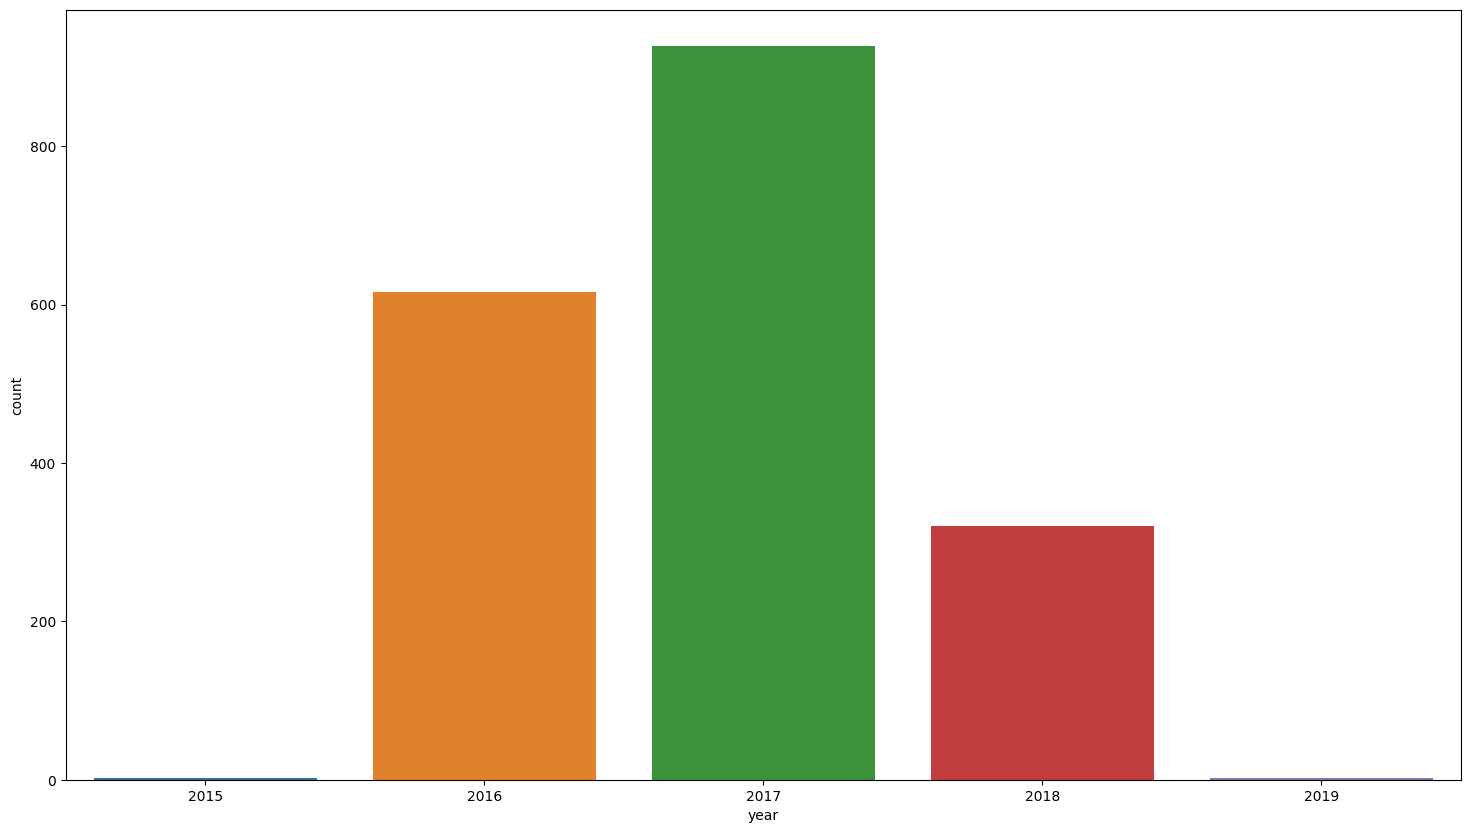

In [795]:
# number of link installed in each year 
ax,fig = plt.subplots(1,1,figsize = (18,10))
sns.countplot(x=df_loc_reco['year'])

<AxesSubplot:xlabel='Active_date', ylabel='count'>

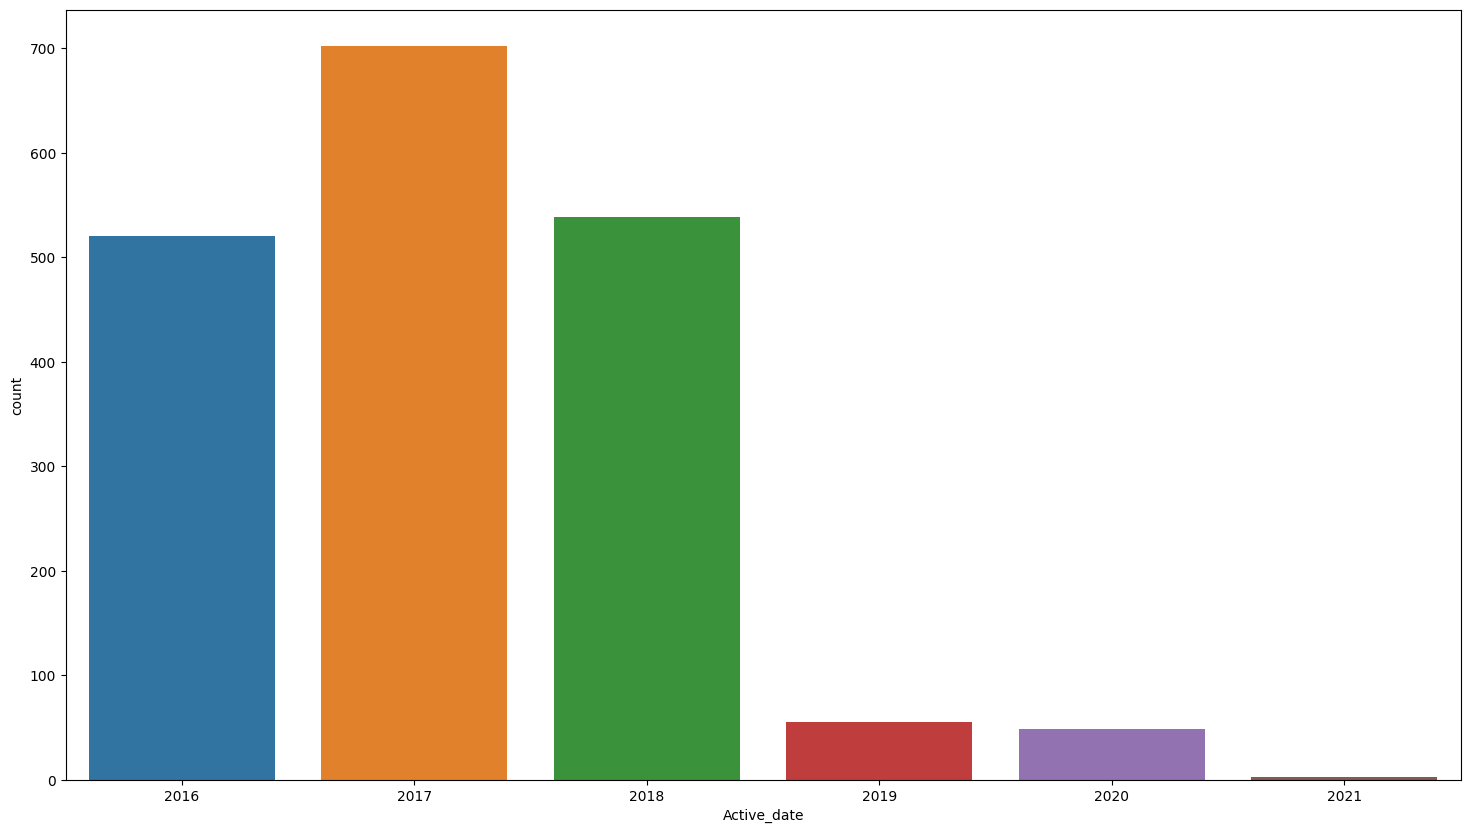

In [796]:
# number of link activated in each year 
ax,fig = plt.subplots(1,1,figsize = (18,10))
sns.countplot(x=df_loc_reco['Active_date'].dt.year)

We can see the most installation and activation happened in between year 2016 til 2018

For shiny app and pretty wise, we could categroize this by different neighboorhood 

In [797]:
df_loc_reco['Borough'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

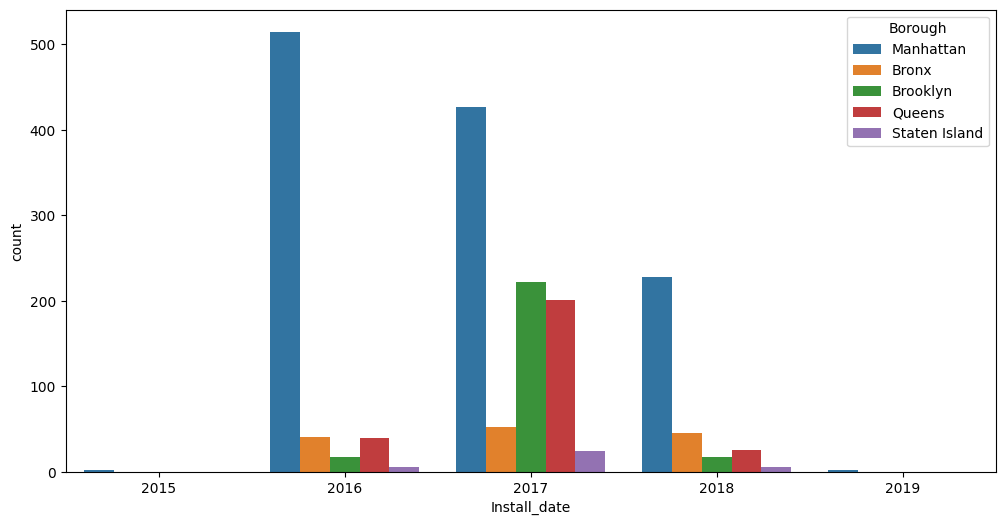

In [803]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

# add a second categorical variable day_of_week
sns.countplot(x=df_loc_reco['Install_date'].dt.year,
            hue='Borough',
            data=df_loc_reco);

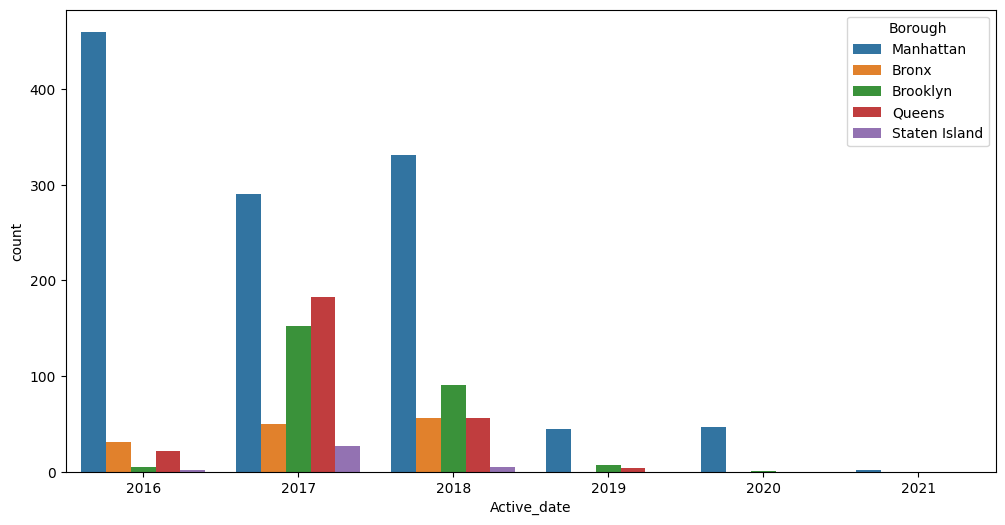

In [804]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

# add a second categorical variable day_of_week
sns.countplot(x=df_loc_reco['Active_date'].dt.year,
            hue='Borough',
            data=df_loc_reco);

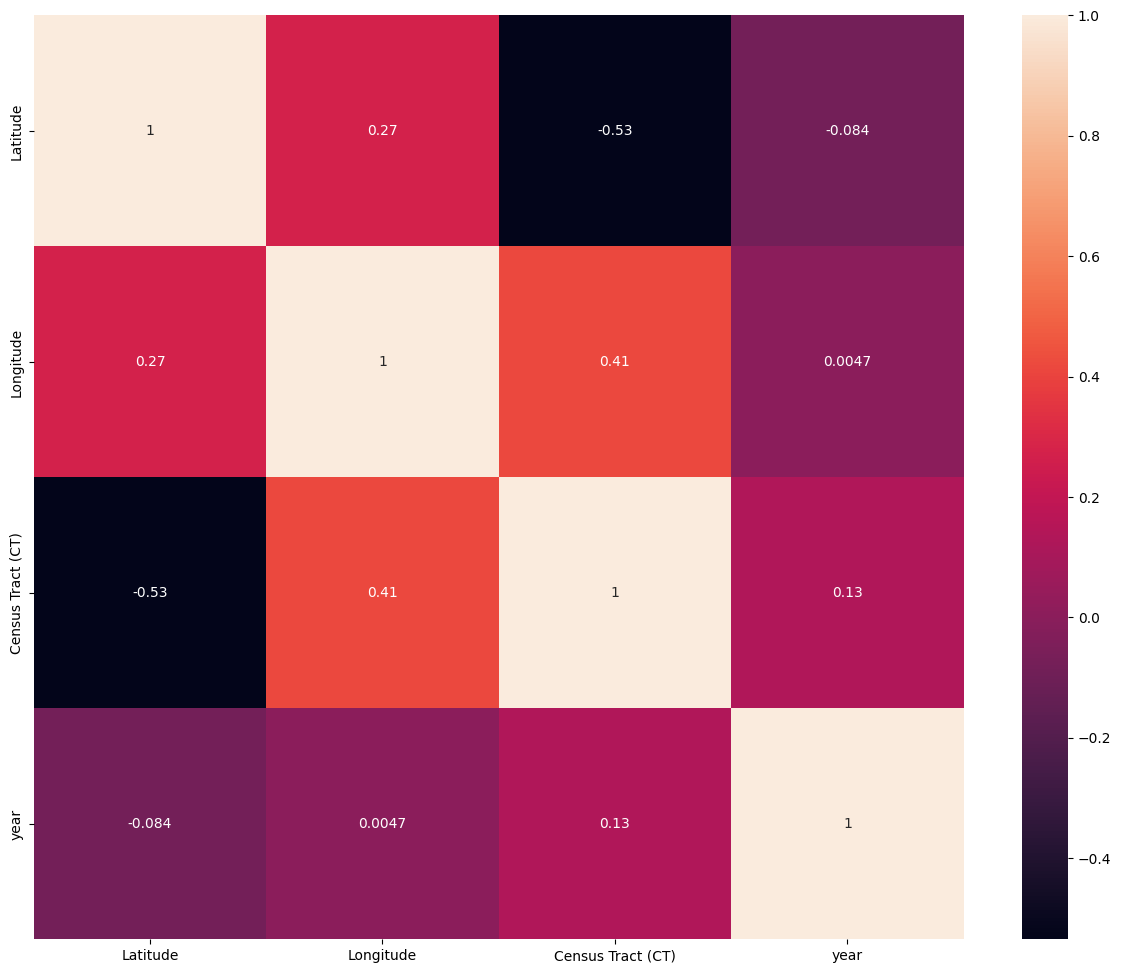

In [798]:
corr = df_loc_reco.corr()
fig,ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, annot=True)
plt.show()

## Visualization For Usage dataset 

In [557]:
df_usage.keys()

Index(['Week', 'Sessions Per Week', 'Cumulative Sessions To Date',
       'Bandwidth Utilization Per Week (TB)',
       'Cumulative Bandwidth Utilization To Date (TB)',
       'New Subscribers Per Week', 'Total Subscribers Per Week',
       'Cumulative Subscribers To Date', 'Usage_time'],
      dtype='object')

<AxesSubplot:xlabel='Week,Week'>

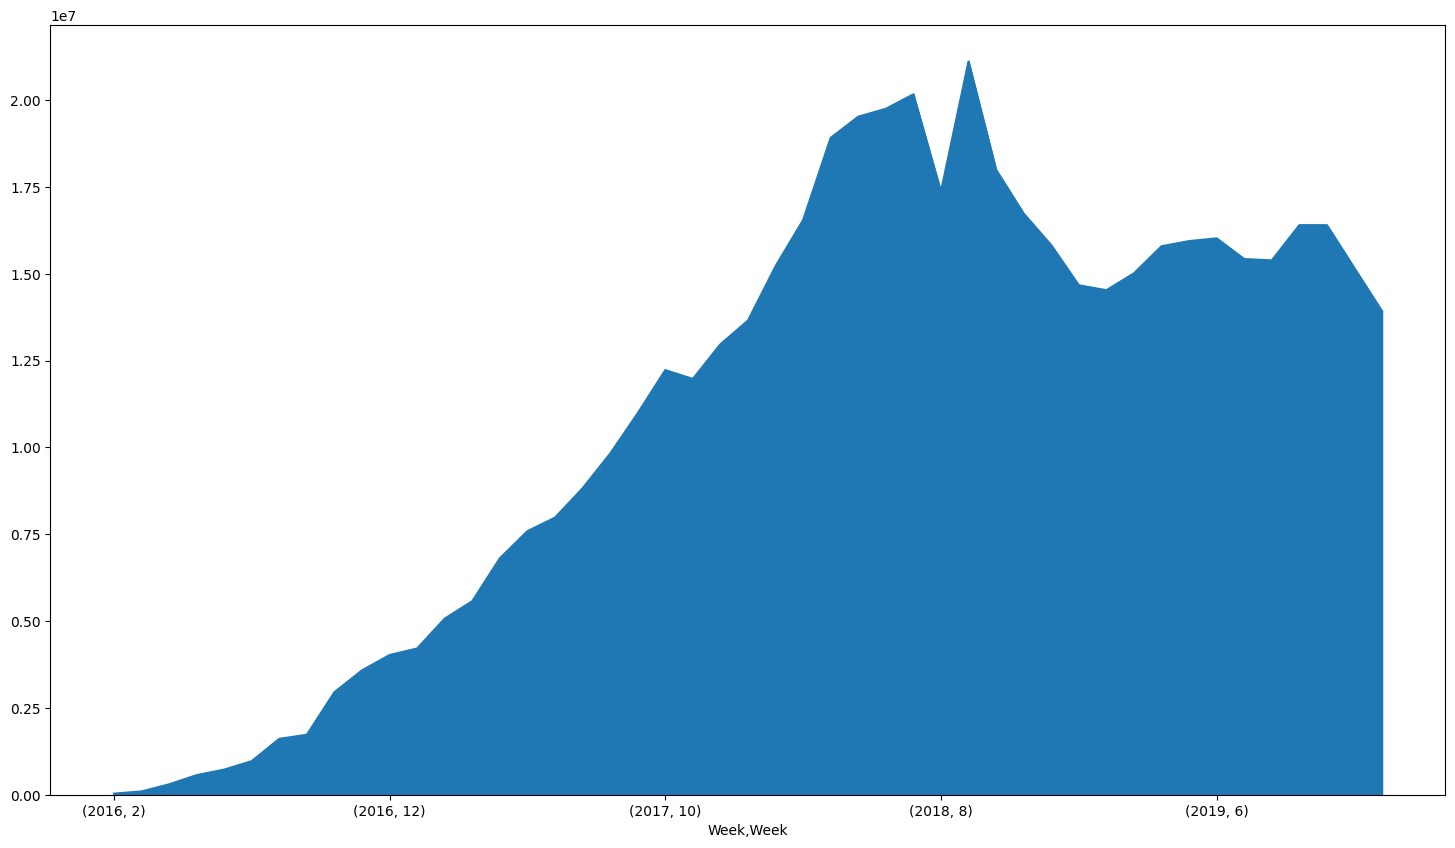

In [543]:
ax,fig = plt.subplots(1,1,figsize = (18,10))

df_usage['Sessions Per Week'].groupby([df_usage["Week"].dt.year, df_usage["Week"].dt.month]).mean().plot(kind="area")

We can see that the number of weekly sessions gradually increasing and it reaches peak around middle 2018 (roughly speaking, June or July) and after that it decreased a little bit 

<AxesSubplot:xlabel='Week,Week'>

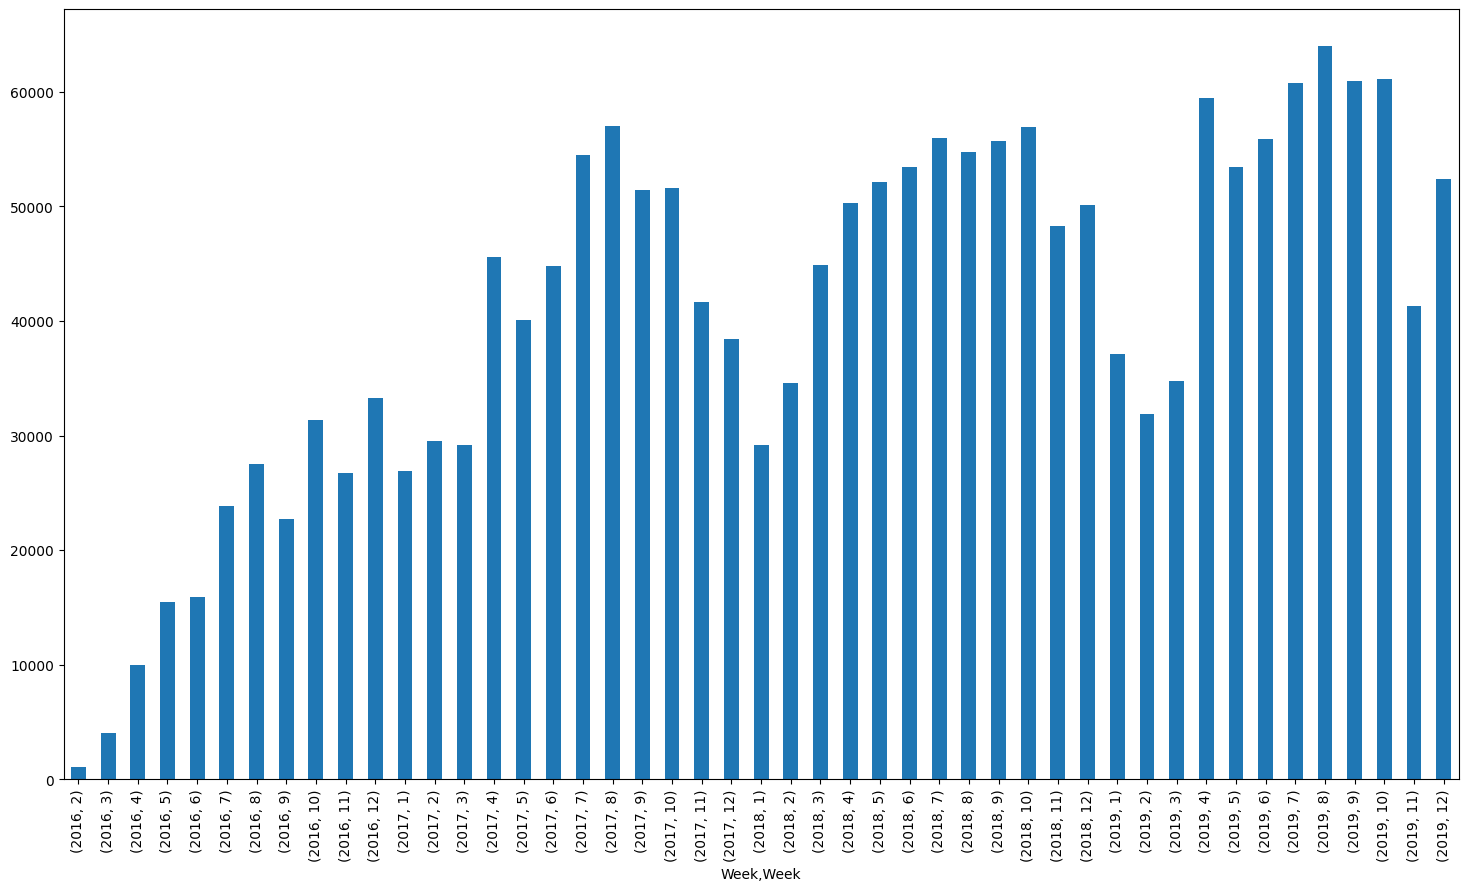

In [544]:
ax,fig = plt.subplots(1,1,figsize = (18,10))
df_usage['New Subscribers Per Week'].groupby([df_usage["Week"].dt.year,
                                              df_usage["Week"].dt.month]).mean().plot(kind="bar")

We can see that the weekly new users are inflated, and seems to reaches a peak during the summer of the year (roughly speaking, May til Oct) 

In [545]:
test

0      181.0
1      167.0
2      169.0
3      189.0
4      173.0
       ...  
195    297.0
196    279.0
197    303.0
198    314.0
199    314.0
Name: Average Session Duration, Length: 200, dtype: float64

<AxesSubplot:xlabel='Week,Week'>

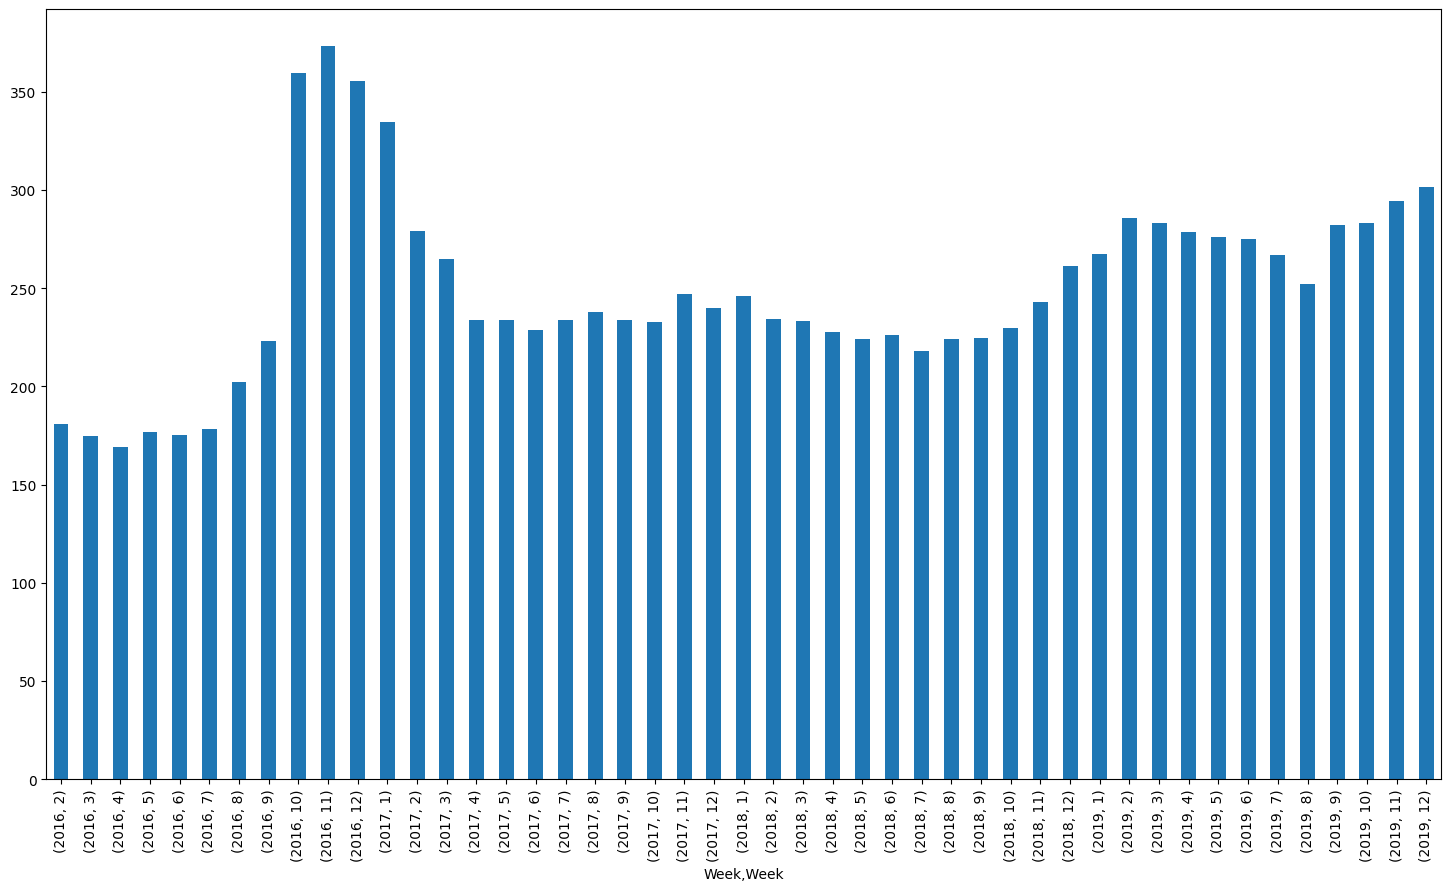

In [546]:
ax,fig = plt.subplots(1,1,figsize = (18,10))
df_usage['Usage_time'].groupby([df_usage["Week"].dt.year
                                ,df_usage["Week"].dt.month]).mean().plot(kind="bar")

The overall average usage time is pretty stable and it didn't change much over time 

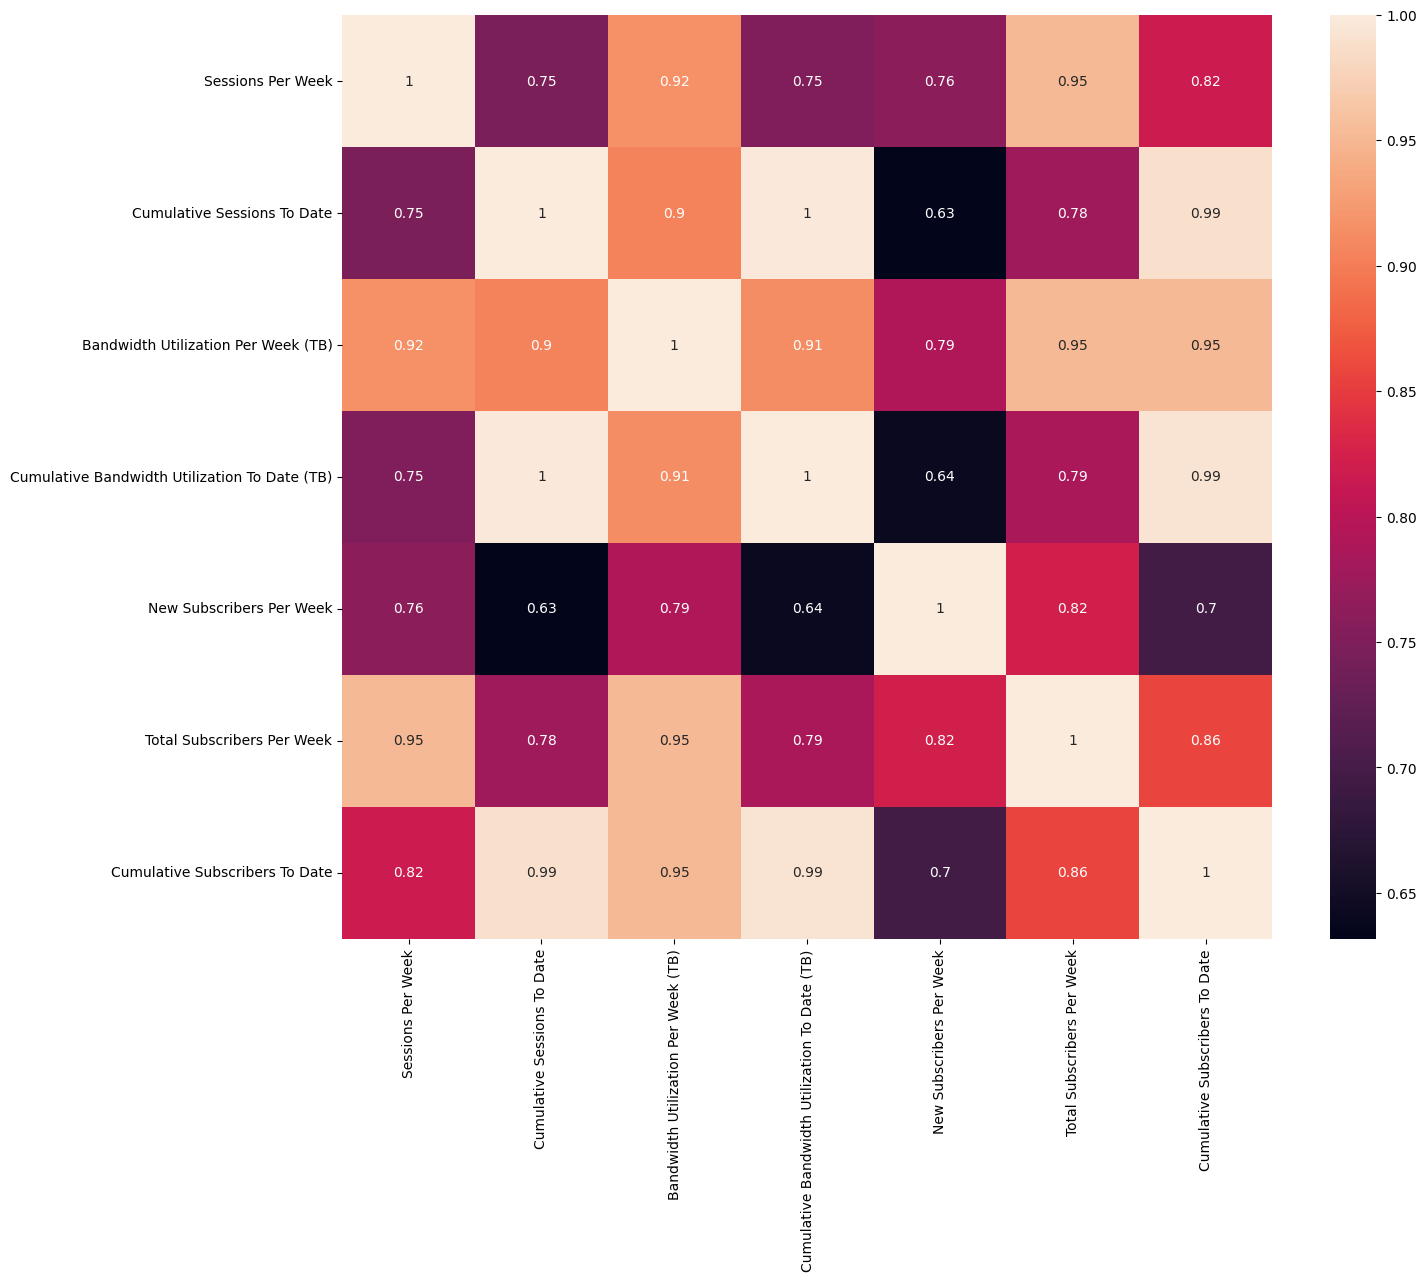

In [799]:
corr = df_usage.corr()
fig,ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, annot=True)
plt.show()